In [118]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [119]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [120]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools


/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


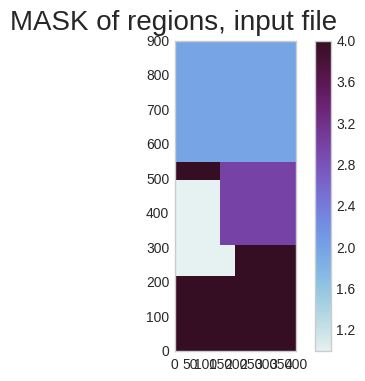

In [121]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('MASK of regions, input file',fontsize=20)


#### Algorithm considering deep saturated water
#### Saturation horizon is below all supersaturated water....
    first_proper_undersat = np.min(t_indar[t_indar>max_supsat])
    Saturation horizon is below all supersaturated water....

In [122]:
j0 = nc.Dataset('./OmA_shfind_considering_deep_saturated_water/OmA_horizon_2015_newalg_0_100.nc')
j0_pi = j0['model_output']['OmArHORIZON_pi']
j0_br = j0['model_output']['OmArHORIZON_br']
j1 = nc.Dataset('./OmA_shfind_considering_deep_saturated_water/OmA_horizon_2015_newalg_100_200.nc')
j1_pi = j1['model_output']['OmArHORIZON_pi']
j1_br = j1['model_output']['OmArHORIZON_br']
j2 = nc.Dataset('./OmA_shfind_considering_deep_saturated_water/OmA_horizon_2015_newalg_200_300.nc')
j2_pi = j2['model_output']['OmArHORIZON_pi']
j2_br = j2['model_output']['OmArHORIZON_br']
# j3 = nc.Dataset('OmA_horizon_2015_newalg_300_400.nc')
# j3_pi = j3['model_output']['OmArHORIZON_pi']
# j3_br = j3['model_output']['OmArHORIZON_br']
# j4 = nc.Dataset('OmA_horizon_2015_newalg_400_500.nc')
# j4_pi = j4['model_output']['OmArHORIZON_pi']
# j4_br = j4['model_output']['OmArHORIZON_br']
j5 = nc.Dataset('./OmA_shfind_considering_deep_saturated_water/OmA_horizon_2015_newalg_500_600.nc')
j5_pi = j5['model_output']['OmArHORIZON_pi']
j5_br = j5['model_output']['OmArHORIZON_br']
j6 = nc.Dataset('./OmA_shfind_considering_deep_saturated_water/OmA_horizon_2015_newalg_600_700.nc')
j6_pi = j6['model_output']['OmArHORIZON_pi']
j6_br = j6['model_output']['OmArHORIZON_br']
j7 = nc.Dataset('./OmA_shfind_considering_deep_saturated_water/OmA_horizon_2015_newalg_700_800.nc')
j7_pi = j7['model_output']['OmArHORIZON_pi']
j7_br = j7['model_output']['OmArHORIZON_br']
j8 = nc.Dataset('./OmA_shfind_considering_deep_saturated_water/OmA_horizon_2015_newalg_800_898.nc')
j8_pi = j8['model_output']['OmArHORIZON_pi']
j8_br = j8['model_output']['OmArHORIZON_br']

In [123]:
Oma_pi = np.zeros([365,898,398])
Oma_br = np.zeros([365,898,398])
Oma_pi[:] = np.nan
Oma_br[:] = np.nan
Oma_pi[:,0:100,:] = j0_pi[:,0:100,:]
Oma_pi[:,100:200,:] = j1_pi[:,100:200,:]
Oma_pi[:,200:300,:] = j2_pi[:,200:300,:]
# Oma_pi[:,300:400,:] = j3_pi[:,300:400,:]
# Oma_pi[:,400:500,:] = j4_pi[:,400:500,:]
Oma_pi[:,500:600,:] = j5_pi[:,500:600,:]
Oma_pi[:,600:700,:] = j6_pi[:,600:700,:]
Oma_pi[:,700:800,:] = j7_pi[:,700:800,:]
Oma_pi[:,800:898,:] = j8_pi[:,800:898,:]
Oma_br[:,0:100,:] = j0_br[:,0:100,:]
Oma_br[:,100:200,:] = j1_br[:,100:200,:]
Oma_br[:,200:300,:] = j2_br[:,200:300,:]
# Oma_br[:,300:400,:] = j3_br[:,300:400,:]
# Oma_br[:,400:500,:] = j4_br[:,400:500,:]
Oma_br[:,500:600,:] = j5_br[:,500:600,:]
Oma_br[:,600:700,:] = j6_br[:,600:700,:]
Oma_br[:,700:800,:] = j7_br[:,700:800,:]
Oma_br[:,800:898,:] = j8_br[:,800:898,:]

In [124]:
f = nc.Dataset('OmA_horizon_newalg_consdeep.nc','w', format='NETCDF4') #'w' stands for write
g = f.createGroup('model_output')
#g.createDimension('days', len(3))
g.createDimension('days', 365)
g.createDimension('ys', 898)
g.createDimension('xs', 398)
ts = g.createVariable('OmArHORIZON_pi','f4',('days','ys','xs'))
ts[:] = Oma_pi
ts2 = g.createVariable('OmArHORIZON_br','f4',('days','ys','xs'))
ts2[:] = Oma_br
f.close()

In [125]:
Oma_hor = nc.Dataset('OmA_horizon_newalg_consdeep.nc')

OmArHORIZON_pi_newalg =  Oma_hor['model_output']['OmArHORIZON_pi'][90,:,:]
OmArHORIZON_br_newalg =  Oma_hor['model_output']['OmArHORIZON_br'][90,:,:]

OmA_h_janfeb_pi_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_pi'][0:60,:,:])
OmA_h_dec_pi_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_pi'][364-60:-1,:,:])
OmA_h_winter_pi_newalg =  np.concatenate([OmA_h_janfeb_pi_newalg,OmA_h_dec_pi_newalg])

OmA_h_janfeb_br_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_br'][0:60,:,:])
OmA_h_dec_br_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_br'][364-60:-1,:,:])
OmA_h_winter_br_newalg =  np.concatenate([OmA_h_janfeb_br_newalg,OmA_h_dec_br_newalg])

#midmay to sept 1 
OmA_h_summer_pi_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_pi'][134:243,:,:])
OmA_h_summer_br_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_br'][134:243,:,:])

OmA_h_winter_mean_br_newalg =  np.nanmean(OmA_h_winter_br_newalg,axis = 0)
OmA_h_winter_mean_pi_newalg =  np.nanmean(OmA_h_winter_pi_newalg,axis = 0)
OmA_h_summer_mean_br_newalg =  np.nanmean(OmA_h_summer_br_newalg,axis = 0)
OmA_h_summer_mean_pi_newalg =  np.nanmean(OmA_h_summer_pi_newalg,axis = 0)

print(np.shape(OmA_h_winter_mean_br_newalg))
print(np.shape(OmA_h_winter_mean_br_newalg))

/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: Mean of empty slice


(898, 398)
(898, 398)


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: Mean of empty slice


/home/tjarniko/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/tjarniko/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


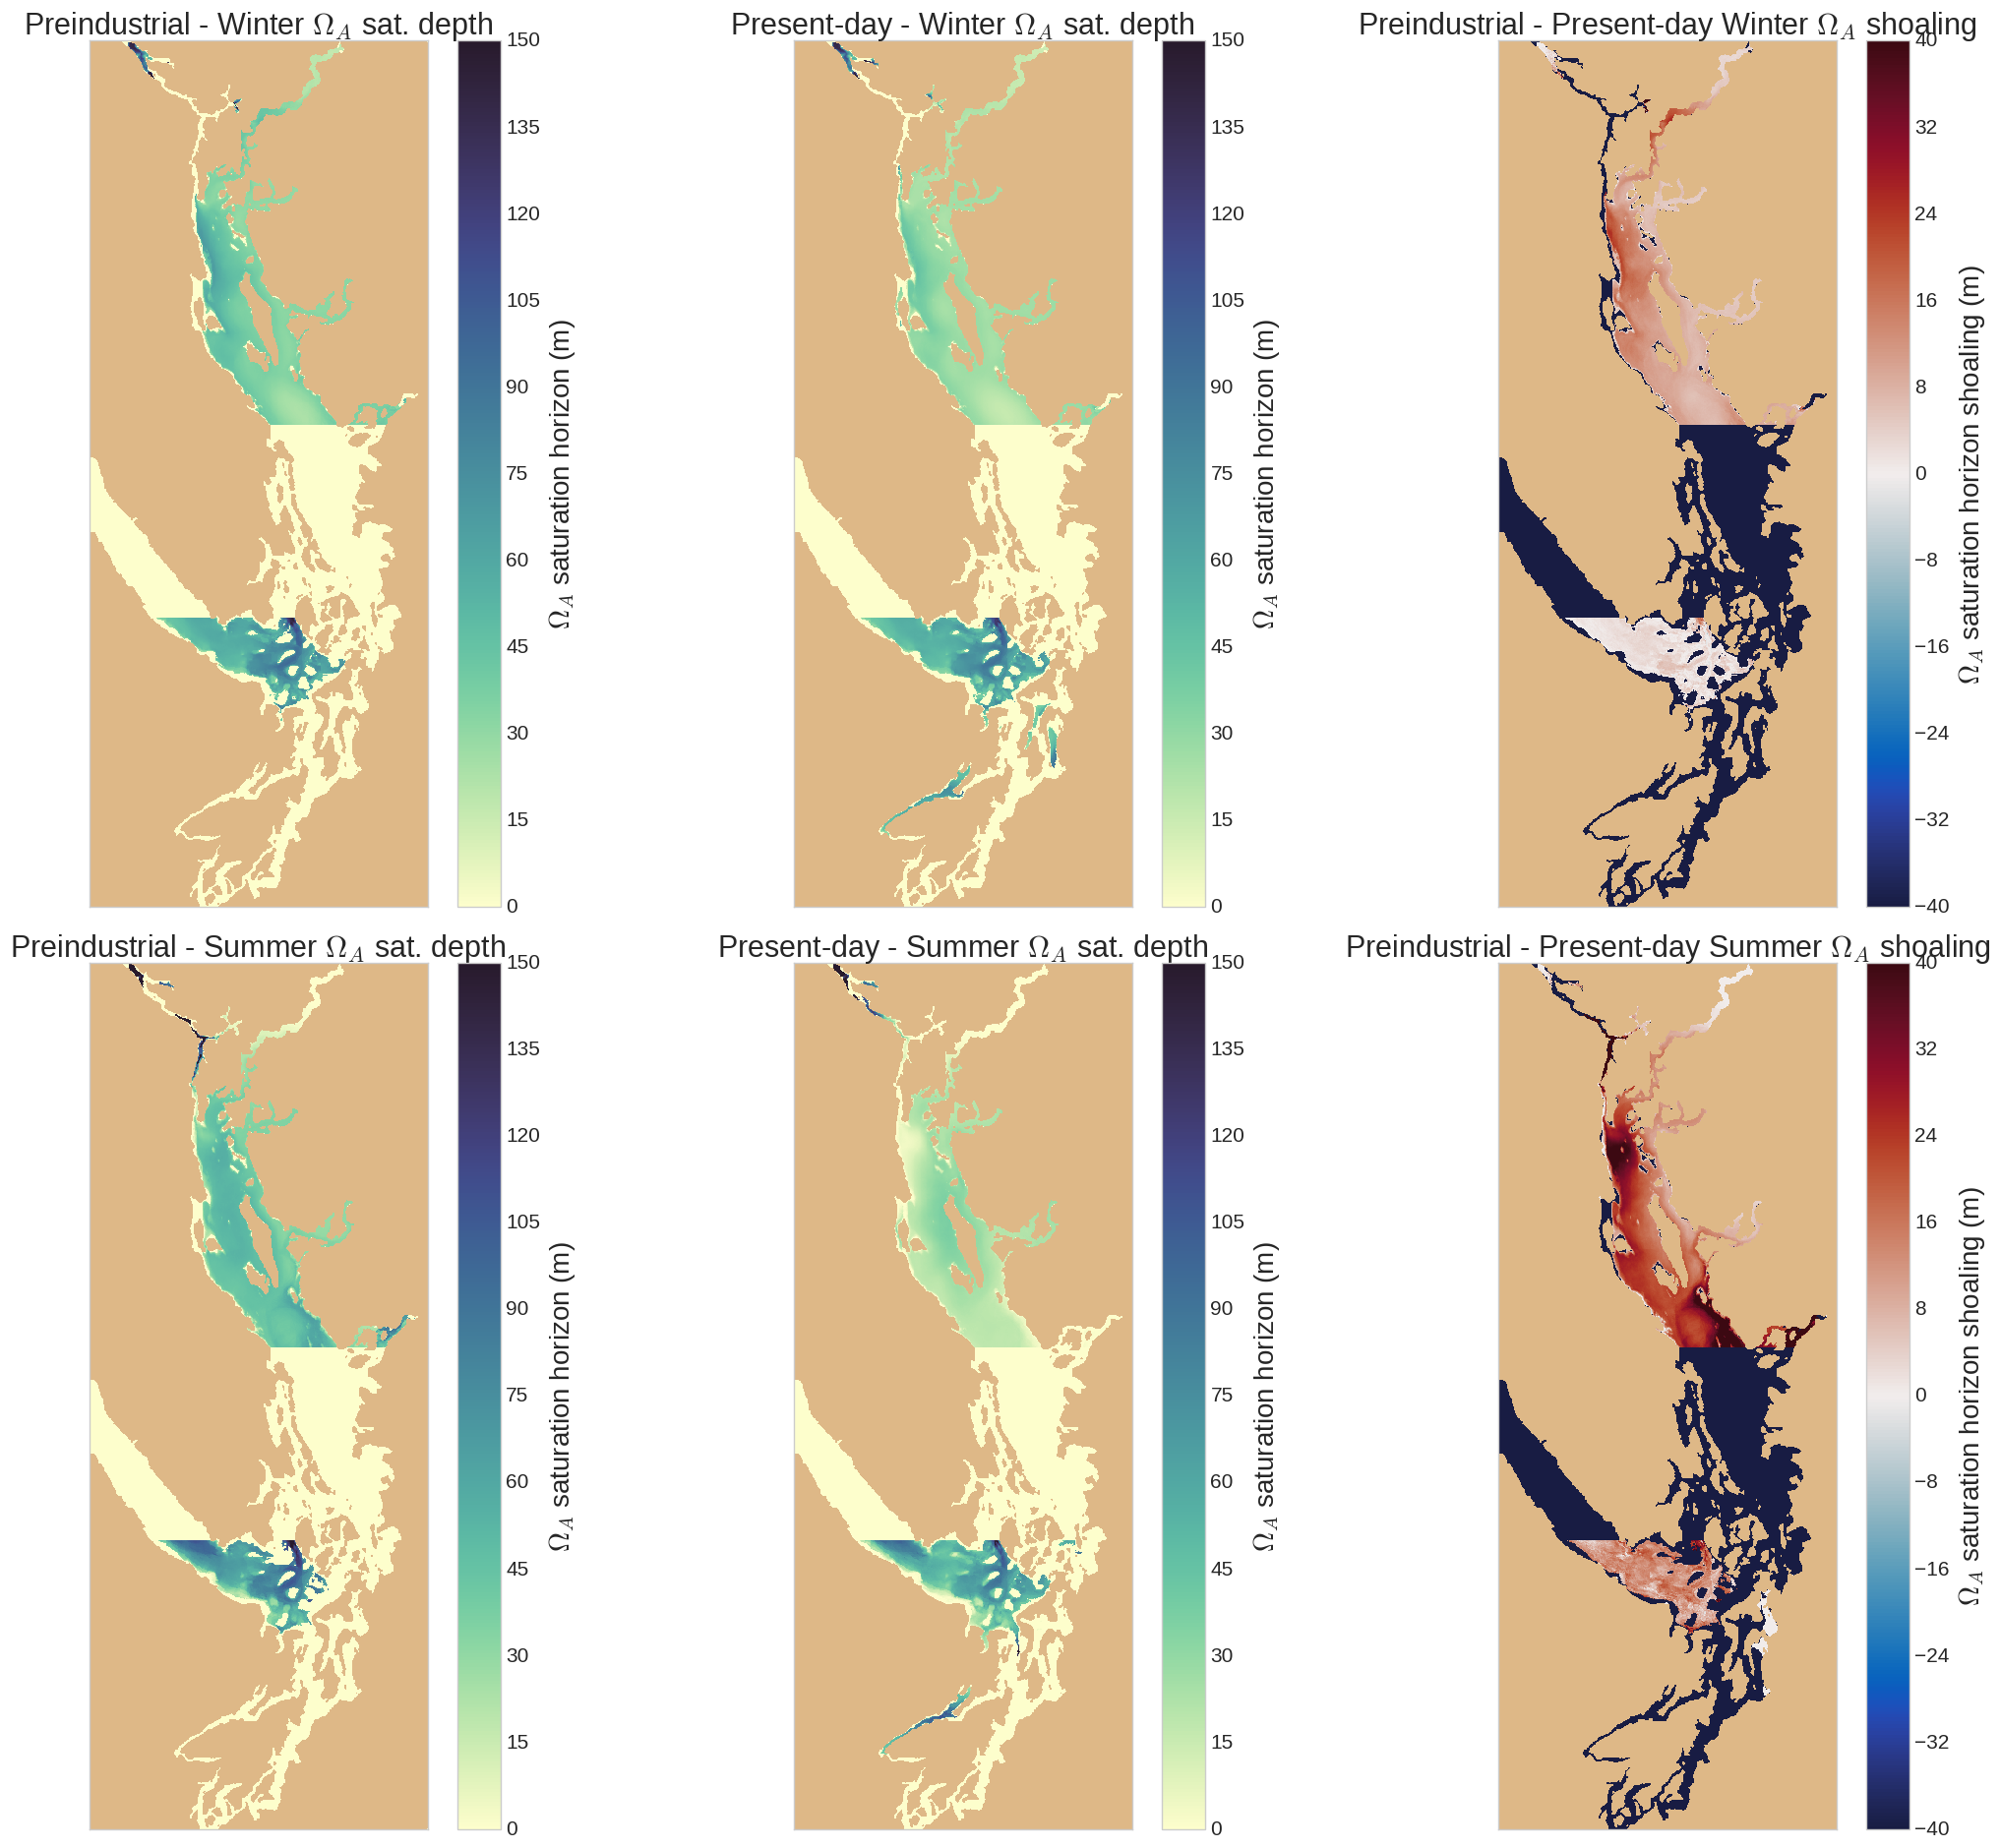

In [126]:
fig = plt.figure(figsize=(12*1.8,10.5*1.8))

ax1 = fig.add_subplot(2,3,1)
cmap = cm.cm.deep
tplt = OmA_h_winter_mean_pi_newalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax1.set_title('Preindustrial - Winter $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax2 = fig.add_subplot(2,3,2)
cmap = cm.cm.deep
tplt = OmA_h_winter_mean_br_newalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('Present-day - Winter $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)
 
ax3 = fig.add_subplot(2,3,3)
cmap = cm.cm.balance
tplt = OmA_h_winter_mean_pi_newalg - OmA_h_winter_mean_br_newalg
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-40, vmax=40)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=15)
ax3.set_title('Preindustrial - Present-day Winter $\Omega_A$ shoaling', fontsize = 22)
cbar.set_label('$\Omega_A$ saturation horizon shoaling (m)', fontsize = 20)


ax1 = fig.add_subplot(2,3,4)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_pi_newalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)

ax1.set_title('Preindustrial - Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax2 = fig.add_subplot(2,3,5)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_br_newalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('Present-day - Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax3 = fig.add_subplot(2,3,6)
cmap = cm.cm.balance
tplt = OmA_h_summer_mean_pi_newalg - OmA_h_summer_mean_br_newalg
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-40, vmax=40)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax3.set_title('Preindustrial - Present-day Summer $\Omega_A$ shoaling', fontsize = 22)
cbar = plt.colorbar(mesh)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon shoaling (m)', fontsize = 20)

cmap.set_bad('red')
cmap.set_bad('red')

plt.tight_layout()

In [127]:
OmA_deepAlg = { 'PI': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'},
                'BR': {'JdF': 'value_1', 'N. Sog': 'value_1', 'S. Sog': 'value_1', 'Haro': 'value_1'}}


In [128]:
OmA_deepAlg_summer = { 'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}
OmA_deepAlg_winter = { 'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}


reg = ['JdF','N. Sog','S. Sog','Haro']
for i in range(1,5):
    
    surf_mask = mask[0,:,:]
    
    reg_mask = np.where(surf_mask == i)
    print('')
    print(reg[i-1])
    
    summer_shoal = (OmA_h_summer_mean_pi_newalg - OmA_h_summer_mean_br_newalg)
    print('average summer sat. hor. (PI): ', np.nanmean(OmA_h_summer_mean_pi_newalg[reg_mask]))
    OmA_deepAlg_summer['PI'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_pi_newalg[reg_mask])
    print('average summer sat. hor (BR): ', np.nanmean(OmA_h_summer_mean_br_newalg[reg_mask]))
    OmA_deepAlg_summer['BR'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_br_newalg[reg_mask])
    print('PI-BR shoaling summer: ', np.nanmean(summer_shoal[reg_mask]))
    
    winter_shoal = (OmA_h_winter_mean_pi_newalg - OmA_h_winter_mean_br_newalg)
    print('average winter sat. hor. (PI): ', np.nanmean(OmA_h_winter_mean_pi_newalg[reg_mask]))
    OmA_deepAlg_winter['PI'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_pi_newalg[reg_mask])
    print('average winter sat. hor (BR): ', np.nanmean(OmA_h_winter_mean_br_newalg[reg_mask]))
    OmA_deepAlg_winter['BR'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_br_newalg[reg_mask])
    print('PI-BR shoaling winter: ', np.nanmean(winter_shoal[reg_mask]))
    



JdF
average summer sat. hor. (PI):  62.174282
average summer sat. hor (BR):  44.771046
PI-BR shoaling summer:  12.40878
average winter sat. hor. (PI):  54.505367
average winter sat. hor (BR):  52.26498
PI-BR shoaling winter:  2.085263

N. Sog
average summer sat. hor. (PI):  39.353195
average summer sat. hor (BR):  20.437103
PI-BR shoaling summer:  18.374588
average winter sat. hor. (PI):  38.771473
average winter sat. hor (BR):  28.565002
PI-BR shoaling winter:  10.002906

S. Sog
average summer sat. hor. (PI):  44.503628
average summer sat. hor (BR):  13.4539795
PI-BR shoaling summer:  30.580738
average winter sat. hor. (PI):  32.405994
average winter sat. hor (BR):  23.852438
PI-BR shoaling winter:  8.394029

Haro
average summer sat. hor. (PI):  60.906475
average summer sat. hor (BR):  49.063683
PI-BR shoaling summer:  10.733223
average winter sat. hor. (PI):  70.18626
average winter sat. hor (BR):  63.469044
PI-BR shoaling winter:  2.3656726


#### Algorithm not considering deep saturated water
#### Saturation horizon is shallowest undersaturated water

    first_proper_undersat = np.min(t_indar)
    Saturation horizon simply depth of first undersaturated water

In [129]:
j0 = nc.Dataset('./OmA_shfind_shallowest_undersat/OmA_horizon_2015_newalg_0_100.nc')
j0_pi = j0['model_output']['OmArHORIZON_pi']
j0_br = j0['model_output']['OmArHORIZON_br']
j1 = nc.Dataset('./OmA_shfind_shallowest_undersat/OmA_horizon_2015_newalg_100_200.nc')
j1_pi = j1['model_output']['OmArHORIZON_pi']
j1_br = j1['model_output']['OmArHORIZON_br']
j2 = nc.Dataset('./OmA_shfind_shallowest_undersat/OmA_horizon_2015_newalg_200_300.nc')
j2_pi = j2['model_output']['OmArHORIZON_pi']
j2_br = j2['model_output']['OmArHORIZON_br']
# j3 = nc.Dataset('OmA_horizon_2015_newalg_300_400.nc')
# j3_pi = j3['model_output']['OmArHORIZON_pi']
# j3_br = j3['model_output']['OmArHORIZON_br']
# j4 = nc.Dataset('OmA_horizon_2015_newalg_400_500.nc')
# j4_pi = j4['model_output']['OmArHORIZON_pi']
# j4_br = j4['model_output']['OmArHORIZON_br']
j5 = nc.Dataset('./OmA_shfind_shallowest_undersat/OmA_horizon_2015_newalg_500_600.nc')
j5_pi = j5['model_output']['OmArHORIZON_pi']
j5_br = j5['model_output']['OmArHORIZON_br']
j6 = nc.Dataset('./OmA_shfind_shallowest_undersat/OmA_horizon_2015_newalg_600_700.nc')
j6_pi = j6['model_output']['OmArHORIZON_pi']
j6_br = j6['model_output']['OmArHORIZON_br']
j7 = nc.Dataset('./OmA_shfind_shallowest_undersat/OmA_horizon_2015_newalg_700_800.nc')
j7_pi = j7['model_output']['OmArHORIZON_pi']
j7_br = j7['model_output']['OmArHORIZON_br']
j8 = nc.Dataset('./OmA_shfind_shallowest_undersat/OmA_horizon_2015_newalg_800_898.nc')
j8_pi = j8['model_output']['OmArHORIZON_pi']
j8_br = j8['model_output']['OmArHORIZON_br']

In [130]:
Oma_pi = np.zeros([365,898,398])
Oma_br = np.zeros([365,898,398])
Oma_pi[:] = np.nan
Oma_br[:] = np.nan
Oma_pi[:,0:100,:] = j0_pi[:,0:100,:]
Oma_pi[:,100:200,:] = j1_pi[:,100:200,:]
Oma_pi[:,200:300,:] = j2_pi[:,200:300,:]
# Oma_pi[:,300:400,:] = j3_pi[:,300:400,:]
# Oma_pi[:,400:500,:] = j4_pi[:,400:500,:]
Oma_pi[:,500:600,:] = j5_pi[:,500:600,:]
Oma_pi[:,600:700,:] = j6_pi[:,600:700,:]
Oma_pi[:,700:800,:] = j7_pi[:,700:800,:]
Oma_pi[:,800:898,:] = j8_pi[:,800:898,:]
Oma_br[:,0:100,:] = j0_br[:,0:100,:]
Oma_br[:,100:200,:] = j1_br[:,100:200,:]
Oma_br[:,200:300,:] = j2_br[:,200:300,:]
# Oma_br[:,300:400,:] = j3_br[:,300:400,:]
# Oma_br[:,400:500,:] = j4_br[:,400:500,:]
Oma_br[:,500:600,:] = j5_br[:,500:600,:]
Oma_br[:,600:700,:] = j6_br[:,600:700,:]
Oma_br[:,700:800,:] = j7_br[:,700:800,:]
Oma_br[:,800:898,:] = j8_br[:,800:898,:]

In [131]:
f = nc.Dataset('OmA_horizon_newalg_shallowestundersat.nc','w', format='NETCDF4') #'w' stands for write
g = f.createGroup('model_output')
#g.createDimension('days', len(3))
g.createDimension('days', 365)
g.createDimension('ys', 898)
g.createDimension('xs', 398)
ts = g.createVariable('OmArHORIZON_pi','f4',('days','ys','xs'))
ts[:] = Oma_pi
ts2 = g.createVariable('OmArHORIZON_br','f4',('days','ys','xs'))
ts2[:] = Oma_br
f.close()

In [132]:
Oma_hor = nc.Dataset('OmA_horizon_newalg_shallowestundersat.nc')

OmArHORIZON_pi_newalg =  Oma_hor['model_output']['OmArHORIZON_pi'][90,:,:]
OmArHORIZON_br_newalg =  Oma_hor['model_output']['OmArHORIZON_br'][90,:,:]

OmA_h_janfeb_pi_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_pi'][0:60,:,:])
OmA_h_dec_pi_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_pi'][364-60:-1,:,:])
OmA_h_winter_pi_newalg =  np.concatenate([OmA_h_janfeb_pi_newalg,OmA_h_dec_pi_newalg])

OmA_h_janfeb_br_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_br'][0:60,:,:])
OmA_h_dec_br_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_br'][364-60:-1,:,:])
OmA_h_winter_br_newalg =  np.concatenate([OmA_h_janfeb_br_newalg,OmA_h_dec_br_newalg])

#midmay to sept 1 
OmA_h_summer_pi_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_pi'][134:243,:,:])
OmA_h_summer_br_newalg =  np.array(Oma_hor['model_output']['OmArHORIZON_br'][134:243,:,:])

OmA_h_winter_mean_br_newalg =  np.nanmean(OmA_h_winter_br_newalg,axis = 0)
OmA_h_winter_mean_pi_newalg =  np.nanmean(OmA_h_winter_pi_newalg,axis = 0)
OmA_h_summer_mean_br_newalg =  np.nanmean(OmA_h_summer_br_newalg,axis = 0)
OmA_h_summer_mean_pi_newalg =  np.nanmean(OmA_h_summer_pi_newalg,axis = 0)

print(np.shape(OmA_h_winter_mean_br_newalg))
print(np.shape(OmA_h_winter_mean_br_newalg))

/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: Mean of empty slice
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: Mean of empty slice


(898, 398)
(898, 398)


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: Mean of empty slice


/home/tjarniko/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/tjarniko/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


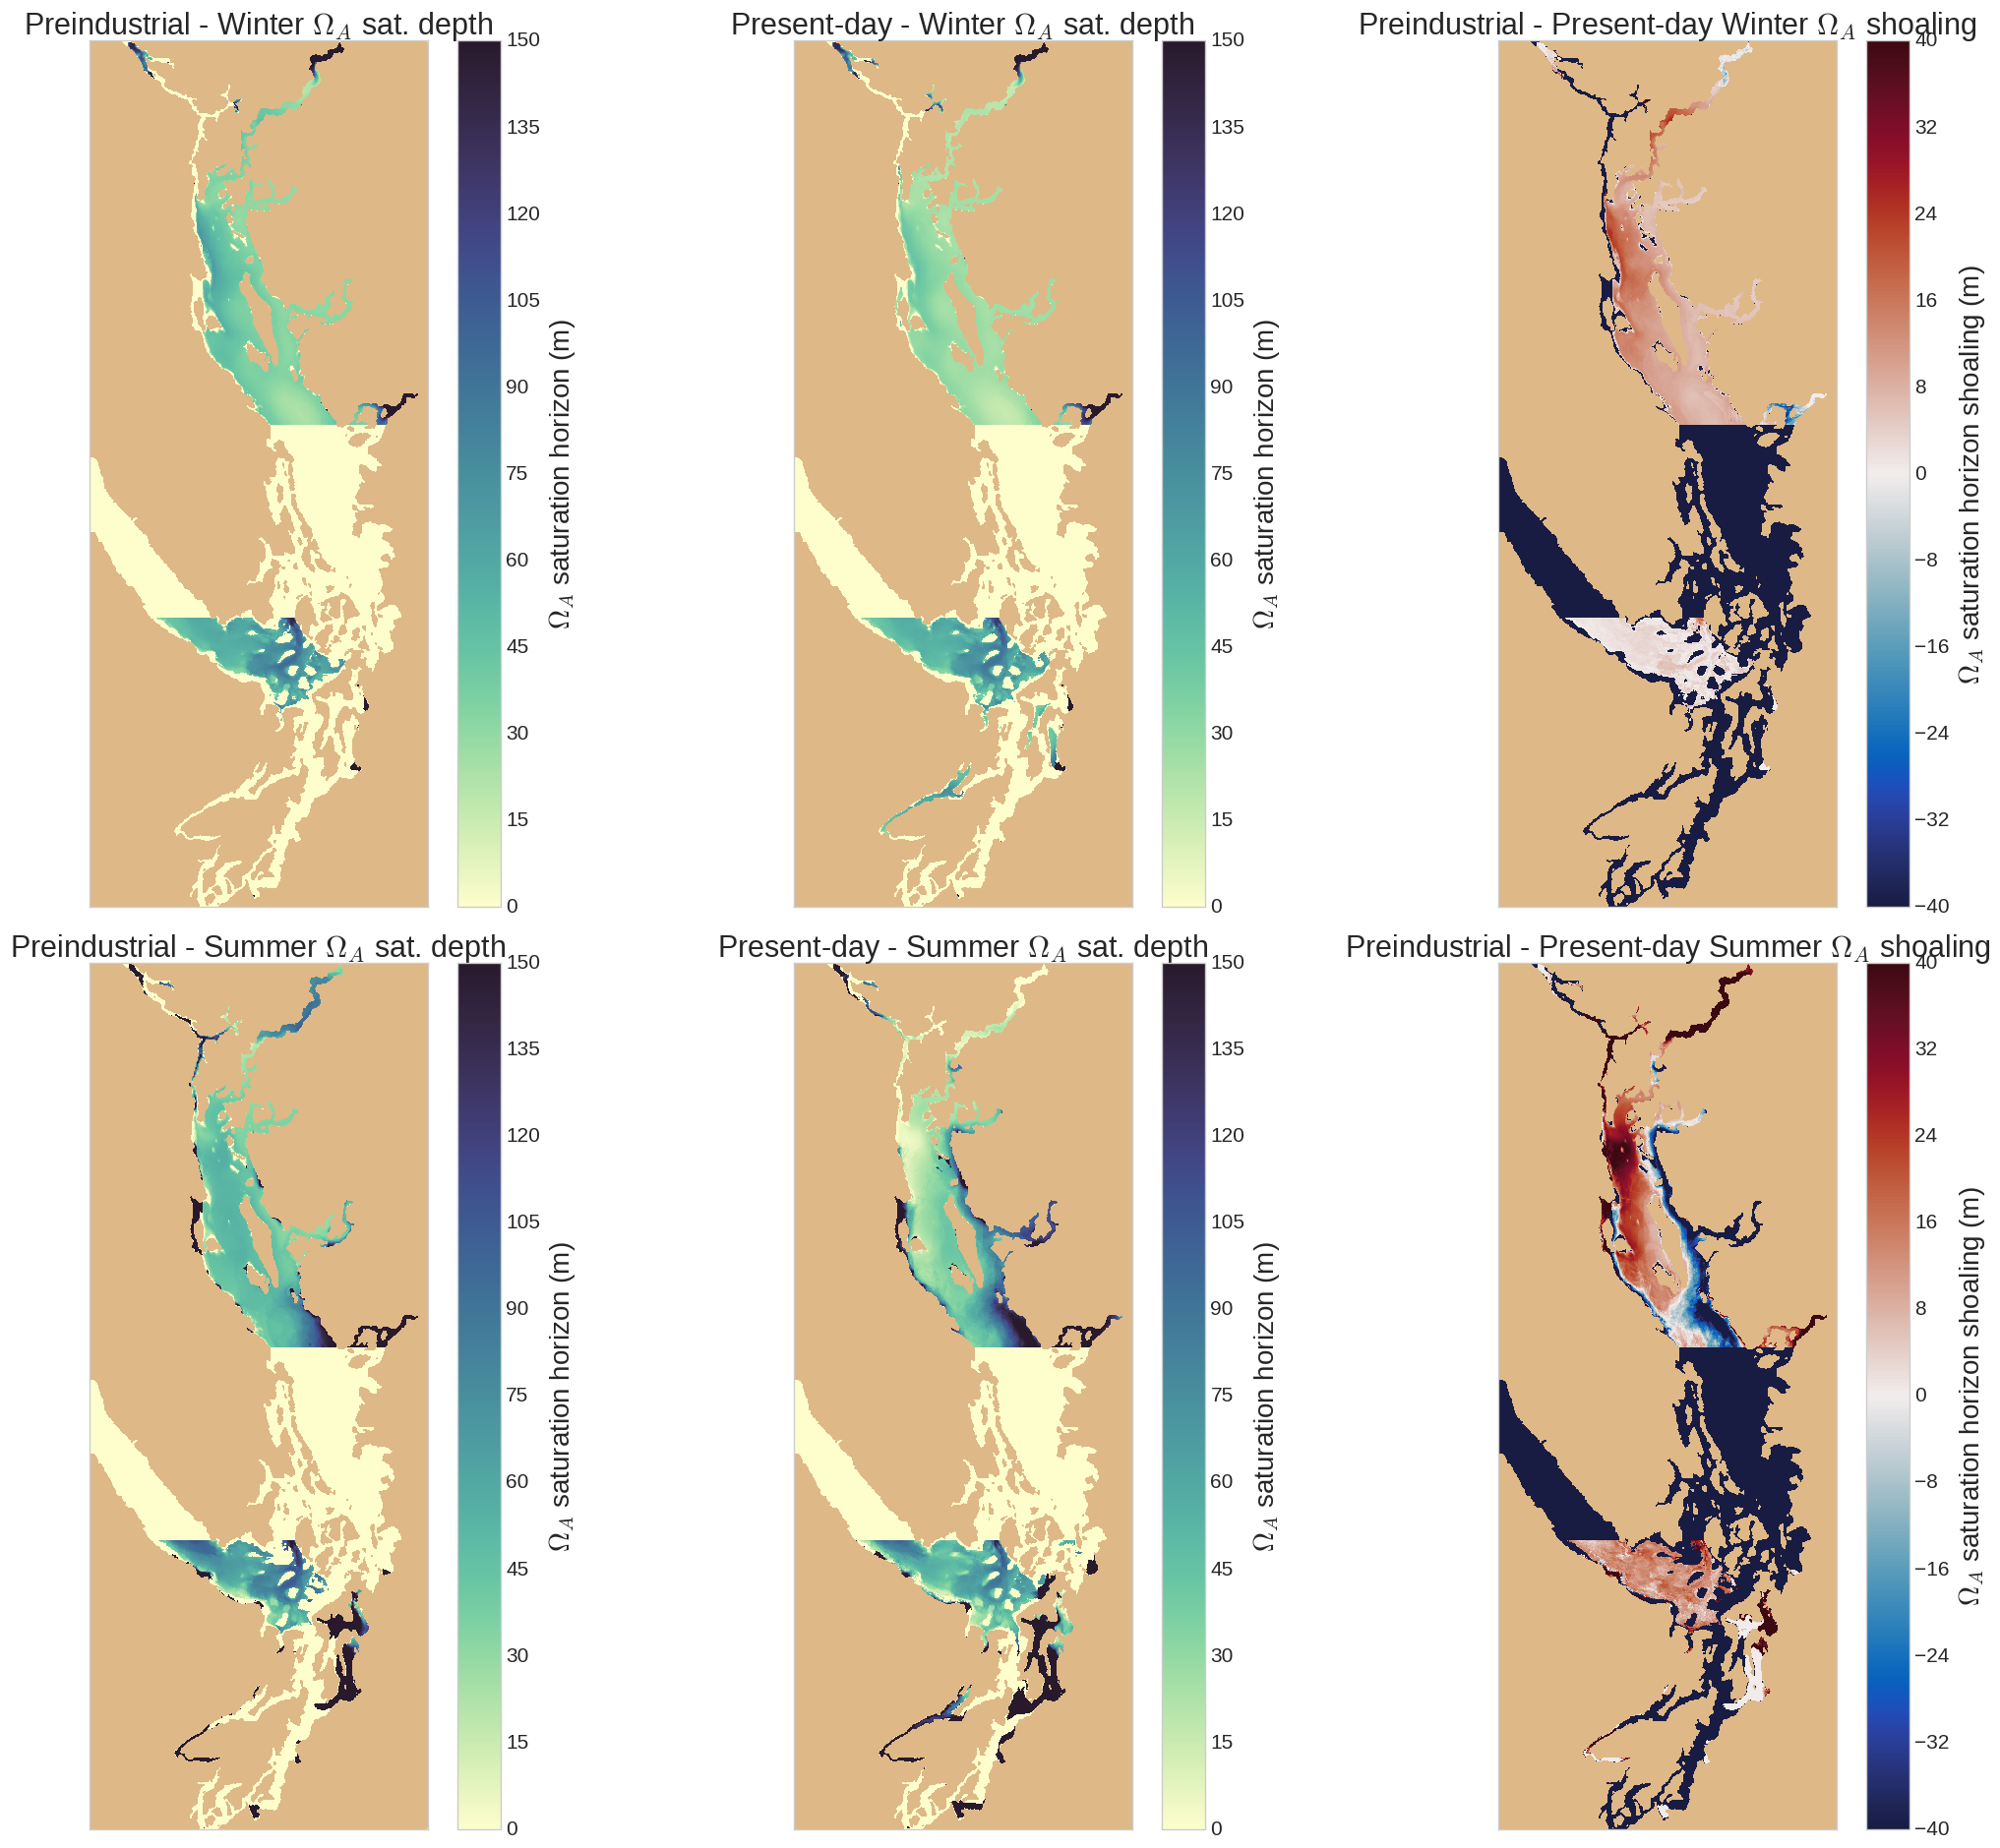

In [133]:
fig = plt.figure(figsize=(12*1.8,10.5*1.8))

ax1 = fig.add_subplot(2,3,1)
cmap = cm.cm.deep
tplt = OmA_h_winter_mean_pi_newalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax1.set_title('Preindustrial - Winter $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax2 = fig.add_subplot(2,3,2)
cmap = cm.cm.deep
tplt = OmA_h_winter_mean_br_newalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('Present-day - Winter $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)
 
ax3 = fig.add_subplot(2,3,3)
cmap = cm.cm.balance
tplt = OmA_h_winter_mean_pi_newalg - OmA_h_winter_mean_br_newalg
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-40, vmax=40)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=15)
ax3.set_title('Preindustrial - Present-day Winter $\Omega_A$ shoaling', fontsize = 22)
cbar.set_label('$\Omega_A$ saturation horizon shoaling (m)', fontsize = 20)


ax1 = fig.add_subplot(2,3,4)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_pi_newalg
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax1, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)

ax1.set_title('Preindustrial - Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax2 = fig.add_subplot(2,3,5)
cmap = cm.cm.deep
tplt = OmA_h_summer_mean_br_newalg
viz_tools.set_aspect(ax2)
mesh = ax2.pcolormesh(tplt, cmap=cm.cm.deep, vmin=0, vmax=150)
viz_tools.plot_land_mask(ax2, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
cbar = plt.colorbar(mesh)
ax2.set_title('Present-day - Summer $\Omega_A$ sat. depth ', fontsize = 22)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon (m)', fontsize = 20)

ax3 = fig.add_subplot(2,3,6)
cmap = cm.cm.balance
tplt = OmA_h_summer_mean_pi_newalg - OmA_h_summer_mean_br_newalg
viz_tools.set_aspect(ax3)
mesh = ax3.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-40, vmax=40)
viz_tools.plot_land_mask(ax3, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
ax3.set_title('Preindustrial - Present-day Summer $\Omega_A$ shoaling', fontsize = 22)
cbar = plt.colorbar(mesh)
plt.xticks([])
plt.yticks([])
cbar.ax.tick_params(labelsize=15)
cbar.set_label('$\Omega_A$ saturation horizon shoaling (m)', fontsize = 20)

cmap.set_bad('red')
cmap.set_bad('red')

plt.tight_layout()

In [134]:
OmA_shalAlg_summer = { 'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}
OmA_shalAlg_winter = { 'PI': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0},
                'BR': {'JdF': 0, 'N. Sog': 0, 'S. Sog': 0, 'Haro': 0}}


reg = ['JdF','N. Sog','S. Sog','Haro']
for i in range(1,5):
    
    surf_mask = mask[0,:,:]
    
    reg_mask = np.where(surf_mask == i)
    print('')
    print(reg[i-1])
    
    summer_shoal = (OmA_h_summer_mean_pi_newalg - OmA_h_summer_mean_br_newalg)
    print('average summer sat. hor. (PI): ', np.nanmean(OmA_h_summer_mean_pi_newalg[reg_mask]))
    OmA_shalAlg_summer['PI'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_pi_newalg[reg_mask])
    print('average summer sat. hor (BR): ', np.nanmean(OmA_h_summer_mean_br_newalg[reg_mask]))
    OmA_shalAlg_summer['BR'][reg[i-1]] = np.nanmean(OmA_h_summer_mean_br_newalg[reg_mask])
    print('PI-BR shoaling summer: ', np.nanmean(summer_shoal[reg_mask]))
    
    winter_shoal = (OmA_h_winter_mean_pi_newalg - OmA_h_winter_mean_br_newalg)
    print('average winter sat. hor. (PI): ', np.nanmean(OmA_h_winter_mean_pi_newalg[reg_mask]))
    OmA_shalAlg_winter['PI'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_pi_newalg[reg_mask])
    print('average winter sat. hor (BR): ', np.nanmean(OmA_h_winter_mean_br_newalg[reg_mask]))
    OmA_shalAlg_winter['BR'][reg[i-1]] = np.nanmean(OmA_h_winter_mean_br_newalg[reg_mask])
    print('PI-BR shoaling winter: ', np.nanmean(winter_shoal[reg_mask]))
    



JdF
average summer sat. hor. (PI):  69.69798
average summer sat. hor (BR):  53.05413
PI-BR shoaling summer:  16.011314
average winter sat. hor. (PI):  54.505367
average winter sat. hor (BR):  52.26498
PI-BR shoaling winter:  2.085263

N. Sog
average summer sat. hor. (PI):  56.522835
average summer sat. hor (BR):  50.720222
PI-BR shoaling summer:  6.039687
average winter sat. hor. (PI):  44.760166
average winter sat. hor (BR):  34.931126
PI-BR shoaling winter:  9.5972185

S. Sog
average summer sat. hor. (PI):  97.525345
average summer sat. hor (BR):  99.82041
PI-BR shoaling summer:  -2.3350487
average winter sat. hor. (PI):  51.95496
average winter sat. hor (BR):  46.70996
PI-BR shoaling winter:  5.041363

Haro
average summer sat. hor. (PI):  130.72603
average summer sat. hor (BR):  120.92086
PI-BR shoaling summer:  19.641129
average winter sat. hor. (PI):  75.839355
average winter sat. hor (BR):  68.64431
PI-BR shoaling winter:  2.27304


In [135]:

means_shall_summer_BR = np.zeros(4)
means_deep_summer_BR = np.zeros(4)
for i in range(0,4):
    means_shall_summer_BR[i] = OmA_shalAlg_summer['BR'][reg[i]]
    means_deep_summer_BR[i] = OmA_deepAlg_summer['BR'][reg[i]]
    
means_shall_winter_BR = np.zeros(4)
means_deep_winter_BR = np.zeros(4)
for i in range(0,4):
    means_shall_winter_BR[i] = OmA_shalAlg_winter['BR'][reg[i]]
    means_deep_winter_BR[i] = OmA_deepAlg_winter['BR'][reg[i]]
    
means_shall_summer_PI = np.zeros(4)
means_deep_summer_PI = np.zeros(4)

for i in range(0,4):
    means_shall_summer_PI[i] = OmA_shalAlg_summer['PI'][reg[i]]
    means_deep_summer_PI[i] = OmA_deepAlg_summer['PI'][reg[i]]
    
means_shall_winter_PI = np.zeros(4)
means_deep_winter_PI = np.zeros(4)
for i in range(0,4):
    means_shall_winter_PI[i] = OmA_shalAlg_winter['PI'][reg[i]]
    means_deep_winter_PI[i] = OmA_deepAlg_winter['PI'][reg[i]]
 
    
print(means_shall_summer_BR)
print(means_shall_summer_PI)
print(means_deep_summer_BR)
print(means_shall_winter_BR)
print(means_deep_winter_BR)

[ 53.05413055  50.72022247  99.82041168 120.92086029]
[ 69.69798279  56.52283478  97.52534485 130.72602844]
[44.77104568 20.43710327 13.45397949 49.06368256]
[52.26498032 34.93112564 46.70996094 68.64431   ]
[52.26498032 28.56500244 23.85243797 63.46904373]


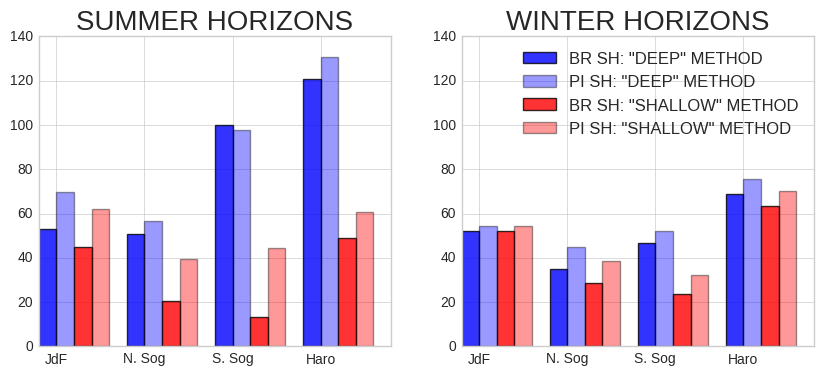

In [146]:
fx = 13
fy = 4
tstn = 'SE'
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
index = np.arange(4)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, means_shall_summer_BR, bar_width,
alpha=opacity,
color='b',
label='BR SH: "DEEP" METHOD')
rects1 = plt.bar(index+0.2, means_shall_summer_PI, bar_width,
alpha=opacity/2,
color='b',
label='PI SH: "DEEP" METHOD')

rects1 = plt.bar(index+0.4, means_deep_summer_BR, bar_width,
alpha=opacity,
color='r',
label='BR SH: "SHALLOW" METHOD')
rects1 = plt.bar(index+0.6, means_deep_summer_PI, bar_width,
alpha=opacity/2,
color='r',
label='PI SH: "SHALLOW" METHOD')

plt.ylim([0,140])
plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('SUMMER HORIZONS', fontsize = 20)

ax = fig.add_subplot(1,2,2)
index = np.arange(4)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, means_shall_winter_BR, bar_width,
alpha=opacity,
color='b',
label='BR SH: "DEEP" METHOD')
rects1 = plt.bar(index+0.2, means_shall_winter_PI, bar_width,
alpha=opacity/2,
color='b',
label='PI SH: "DEEP" METHOD')

rects1 = plt.bar(index+0.4, means_deep_winter_BR, bar_width,
alpha=opacity,
color='r',
label='BR SH: "SHALLOW" METHOD')
rects1 = plt.bar(index+0.6, means_deep_winter_PI, bar_width,
alpha=opacity/2,
color='r',
label='PI SH: "SHALLOW" METHOD')
plt.legend(loc='best')
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

plt.ylim([0,140])
plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('WINTER HORIZONS', fontsize = 20)


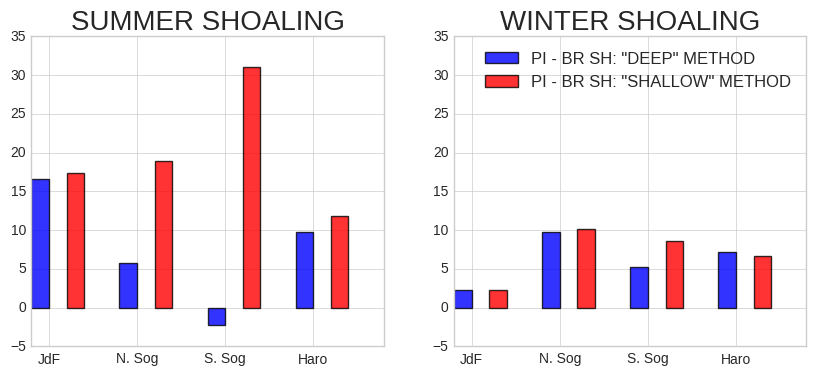

In [148]:
fx = 13
fy = 4
tstn = 'SE'
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
index = np.arange(4)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, means_shall_summer_PI- means_shall_summer_BR, bar_width,
alpha=opacity,
color='b',
label='PI - BR SH: "DEEP" METHOD')


rects1 = plt.bar(index+0.4, means_deep_summer_PI - means_deep_summer_BR, bar_width,
alpha=opacity,
color='r',
label='PI - BR SH: "SHALLOW" METHOD')


plt.ylim([-5,35])

plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('SUMMER SHOALING', fontsize = 20)

ax = fig.add_subplot(1,2,2)
index = np.arange(4)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, means_shall_winter_PI- means_shall_winter_BR, bar_width,
alpha=opacity,
color='b',
label='PI - BR SH: "DEEP" METHOD')


rects1 = plt.bar(index+0.4, means_deep_winter_PI - means_deep_winter_BR, bar_width,
alpha=opacity,
color='r',
label='PI - BR SH: "SHALLOW" METHOD')
plt.legend(loc='best')
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

plt.ylim([-5,35])
plt.xticks(index + bar_width, (reg[0], reg[1], reg[2], reg[3]))
ax.set_title('WINTER SHOALING', fontsize = 20)
